#Stroop Effect Assignment

__1. What is our independent variable? What is our dependent variable?__

Our independent variable is the Stroop Effect test type (congruent or incongruent). The dependent variable is the time it takes to complete the test.


__2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.__

$H_0$ There will be no difference between the mean completion times for the incongruent and congruent test.

$H_a$ There will be a significant increase in completion time for the incongruent test, compared to the congruent test.

$H_0$ $µ_1 - µ_2 ≥ 0$ (the mean difference is greater than or equal to 0)

$H_a$ $µ_1 - µ_2 < 0$ (the mean difference is less than 0)

_($µ_1$ = Population mean completion time for the congruent Stroop Test, $µ_2$ = Population mean completion time for the incongruent Stroop Test)_

I will perform a dependent, single-sample, one-tailed t-test because:

- We have a repeated-measure for individual participants so it is a dependent test
- We don't have an entire population data-set, so we cannot perform a z-test
- We are testing to see if the incongruent Stroop Effect test truly makes it take longer to read colour names, when compared to the congruent test results, so we are looking for an increase in completion time, hence the one-tailed test.


In [19]:
# Import the Pandas library
import pandas as pd
# Load in data
path = r'stroopdata.csv'
dataFrame = pd.read_csv(path)
# Create a derived data frame for the difference values
dataFrame['Difference'] =  dataFrame['Congruent'] - dataFrame['Incongruent']

__3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.__

$x̄_1$: 14.051

$µ_1$: 14.051 (closest estimate we have to population mean)

$x̄_2$: 22.016

$µ_2$: 22.016 (closest estimate we have to population mean)

Mean Difference: - 7.965

Cogruent SD: 3.559

Incongruent SD: 4.797

Difference SD: 4.865

In [20]:
# Use the Pandas descriptive statistics function
dataFrame.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000



__4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.__

Populating the interactive namespace from numpy and matplotlib


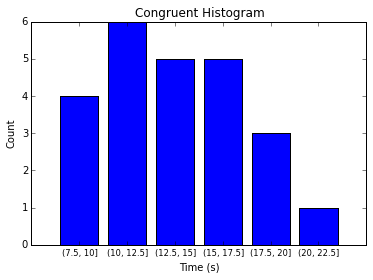

In [4]:
# Visualise the congruent data as histogram, with bins of width 2.5s
%pylab inline

import matplotlib.pyplot as plt
from scipy import stats

# Generate bins for the histogram
grouped = dataFrame.groupby(pd.cut(dataFrame['Congruent'], bins=[7.5, 10, 12.5, 15, 17.5, 20, 22.5]))['Incongruent'].count().reset_index()
grouped

plt.bar(range(len(grouped['Incongruent'])), grouped['Incongruent'], align='center')
plt.xticks(range(len(grouped['Incongruent'])), grouped['Congruent'], size='small')
plt.title("Congruent Histogram")
plt.xlabel("Time (s)")
plt.ylabel("Count")
plt.show()

The congruent data, shown in the histogram above, roughly depicts a positively skewed distribution. Given that there are only 20 participants (n=20), it is practically impossible to determine the shape of the population distribution, but my best estimate looking at the data is that it would be normally distributed or possibly postively skewed.

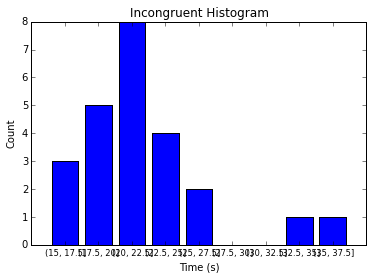

In [53]:
grouped2 = dataFrame.groupby(pd.cut(dataFrame['Incongruent'], bins=[15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5]))['Congruent'].count().reset_index()
grouped2
plt.title("Incongruent Histogram")
plt.xlabel("Time (s)")
plt.ylabel("Count")
plt.bar(range(len(grouped2['Congruent'])), grouped2['Congruent'], align='center')
plt.xticks(range(len(grouped2['Congruent'])), grouped2['Incongruent'], size='small')
plt.show()

The incongruent data is more widely distributed. The data also appears to be on average higher than the data from the congruent test. Yet again, there is not enough data to exactly determine the population distribution, but it seems to be normally distributed, with a possible positive skew.

__5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?__



###Results

Dependent‐Samples t Test

n = 24 (two samples per n)

df = 23

t-critical: - 1.714

SEM: .993

$µ_1 - µ_2 = -7.965$

Margin of Error: 1.702

CI 95% = (-9.667, -6.263)

t-score: -8.020

Cohen's d: -1.637

$r^2$ = .737

p < .001

###Determination

Our confidence level in $H_a$ is > 95%

We can reject the null.


###Conclusion

We can conclude that as the difference in times measured is statistically significant, the Stroop Effect is a likely explanation for our results.

I expected this outcome, because from my own participation, and observing others, the anecdotal evidence suggested this effect was surprisingly strong.

While this test appears to have very conclusive results, and the effect seems to be strong enough that it is apparent from even a relatively small group, the study would be improved by having a larger sample size. Particularly as we do not have a population mean, so I have had to substitute $x̄_0$ as µ.

Furthermore, with no details provided about the selection of participants, these results are at risk to false positives, for example perhaps only 8% of the population is affected by the Stroop Effect, and the participants chosen were pre-screened for being affected, that would jeopardise the results.

__6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!__

I think the mind registers the colour and the word effectively in isolation, and is good at recognising matches automatically, but when it encounters a contradictory scenario (i.e. visual colour different to written) it forces the brain to consciously determine what option is correct. This "fast, slow" thinking has been studied numerous times, and I was introduced to the topic by the book [Thinking, Fast and Slow](http://www.amazon.co.uk/Thinking-Fast-Slow-Daniel-Kahneman/dp/0141033576), by Daniel Kahneman. There seems to be a massive speed difference between subconscious and conscious thought.

The most obvious alternative experiment I can think of, is to read out the colour you see, rather than the written text. The [original Stroop publication](http://psychclassics.yorku.ca/Stroop/) used black text, coloured text and coloured blocks, however he did not compare the times of congruent versus incongruent in seconds to completion - seconds to completion, as modern versions of the test do (such as the one in this experiment).

##Below is some of my initial exploratory work

In [27]:
import csv
congruent = {'data': []}
incongruent = {'data': []}
difference = {'data': []}
n = 0
tCrit = - 1.714
with open('stroopdata.csv', 'rb') as dataFile:
    reader = csv.reader(dataFile)
    next(reader, None)
    for row in reader:
        n += 1
        congruent['data'].append(float(row[0]))
        incongruent['data'].append(float(row[1]))
        difference['data'].append(float(row[0])- float(row[1]))

In [74]:
import math, scipy.stats
print 'Number of records (n)', n
congruent['ave'] = sum(congruent['data'])/n
incongruent['ave'] = sum(incongruent['data'])/n
difference['ave'] = sum(difference['data'])/n
print 'Average time with congruent Test', congruent['ave']
print 'Average time with incongruent Test', incongruent['ave']
print 'Average difference', difference['ave']
difference['variance'] = 0
for val in difference['data']:
    difference['variance'] += (val - difference['ave'])**2 / (n - 1)

congruent['sd'] = math.sqrt(difference['variance'])
SEM = 3.559 / math.sqrt(n)
difference['t'] = (difference['ave'] - 0) / (congruent['sd'] / math.sqrt(n))
print 'Standard Deviation', congruent['sd']
print 't-Statistic', difference['t']
difference['p'] = 1- scipy.stats.norm.sf(difference['t'])
print 'Probability of null hypothesis', difference['p']
print 'T is greater that T-Crit, and therefore reject null', difference['t'] < tCrit
SEM

Number of records (n) 24
Average time with congruent Test 14.051125
Average time with incongruent Test 22.0159166667
Average difference -7.96479166667
Standard Deviation 4.86482691036
t-Statistic -8.02070694411
Probability of null hypothesis 5.55111512313e-16
T is greater that T-Crit, and therefore reject null True


0.7264778328804443

In [75]:
varianceFrame = (dataFrame['Difference'] - dataFrame['Difference'].mean()) ** 2
difVariance = varianceFrame.sum() / 23
difSD = math.sqrt(difVariance)
difSD

4.864826910359056

In [71]:
# T-Statistic
tStat = (dataFrame['Congruent'].mean() - dataFrame['Incongruent'].mean()) / (difSD / math.sqrt(n))
tStat

-8.020706944109955

In [58]:
SEM = difSD / math.sqrt(n)
SEM

0.9930286347783406

In [59]:
dataFrame['Difference'].mean() / SEM

-8.020706944109957

In [60]:
marginOfError = abs(tCrit * SEM)
marginOfError

1.7020510800100757

In [61]:
-marginOfError + dataFrame['Difference'].mean()

-9.666842746676743

In [67]:
marginOfError + dataFrame['Difference'].mean()

-6.262740586656591

In [72]:
dataFrame['Difference'].mean() / difSD

-1.6372199491222625

In [73]:
tStat ** 2 / (tStat ** 2 + 23)

0.7366364161445059

In [51]:
dataFrame['Congruent'].mean()

14.051125000000004

In [49]:
dataFrame['Incongruent'].mean()

22.01591666666667

In [37]:
dataFrame['Difference'].mean()

-7.964791666666667

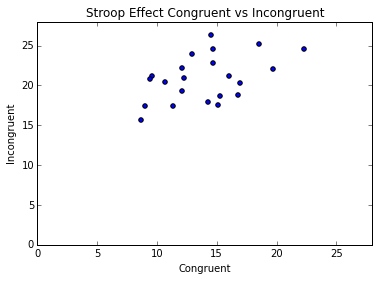

In [260]:
plt.scatter(x=dataFrame['Congruent'], y=dataFrame['Incongruent'])
plt.axis([0, 28, 0, 28])
plt.xlabel("Congruent")
plt.ylabel("Incongruent")
plt.title("Stroop Effect Congruent vs Incongruent")
plt.show()